# Imports

In [10]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
from matplotlib.pyplot import imshow, imsave
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import datetime
import os, sys
import time
import pandas as pd

from matplotlib.pyplot import imshow, imsave
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import shutil

from google.colab import drive
import os

# gdrive_path='/content/gdrive/MyDrive/Capstone thesis Anahit/GANS - implementations/GANs/collect_into_one_architecture/'
gdrive_path='/content/gdrive/MyDrive/GANs/collect_into_one_architecture'

drive.mount('/content/gdrive', force_remount=True)
os.chdir(gdrive_path)
print(sorted(os.listdir()))


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Mounted at /content/gdrive
['Changing_betas.ipynb', 'Changing_clip_values.ipynb', 'Changing_disc_iter.ipynb', 'Changing_learning_rates.ipynb', 'Changing_penalty.ipynb', 'Result-Plots.ipynb', 'Training_best_params.ipynb', '__pycache__', 'data', 'files', 'functions.py', 'generated_images', 'real_images', 'results']


In [11]:
from functions import *

In [12]:
values = pd.read_csv("files/values_of_some_hyperparams.csv")
values

Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0   model_name  n_noise  \
0             0             0             0           0         WGAN      100   
1             1             1             1           1      WGAN_GP      100   
2             2             2             2           2        LSGAN      100   
3             3             3             3           3  Vanilla_GAN      100   

   batch_size  n_critic  max_epochs  clip_value  best_lr  best_beta  
0         128         1          35        0.01    0.001        0.9  
1         128         2          33         NaN    0.001        0.9  
2         128         1          20         NaN    0.001        0.9  
3         128         2          20         NaN    0.001        0.9

In [13]:
disc_iters = [1,2,5]

In [14]:
def run(MODEL_NAME, lrs, batch_size, n_critic, max_epoch, clip_value, n_noise, threshold, beta, random_seed = True):
  
  time_to_finish = []
  root1 = f"results/models/disc_iter/{MODEL_NAME}/"
  root2 = f"results/imgs/disc_iter/{MODEL_NAME}/"
  for i in disc_iters:
    start_time = time.time()
    path_model = root1 + "disc_iter_" + str(i)
    path_img = root2 + "disc_iter_" + str(i)

    if os.path.exists(path_img):
      shutil.rmtree(path_img)
      print(f"Removed {path_img}")
      os.mkdir(path_img)
    else:
      os.mkdir(path_img)
    
    if os.path.exists(path_model):
      shutil.rmtree(path_model)
      print(f"Removed {path_model}")
      os.mkdir(path_model)

    else:
      os.mkdir(path_model)
    print(path_model)
    print(path_img)
    print("*"*30)
    print("\n Discriminator Iterations = ", i, "!")
    if MODEL_NAME == "Vanilla_GAN":
      train_Vanilla_GAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
                learning_rate = lrs, batch_size = batch_size, n_critic = i,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed, 
                threshold = threshold, beta=beta)
    elif MODEL_NAME == "LSGAN":
      train_LSGAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
              learning_rate = lrs, batch_size = batch_size, n_critic = i,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed,
              threshold = threshold, beta=beta)
    elif  MODEL_NAME == "WGAN":
      train_WGAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
              learning_rate = lrs, batch_size = batch_size, n_critic = i,  max_epoch = max_epoch, clip_value = clip_value, n_noise = n_noise,
              random_seed = random_seed, threshold = threshold, beta = beta)
    elif MODEL_NAME == "WGAN_GP":
      train_WGAN_GP(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
              learning_rate = lrs, batch_size = batch_size, n_critic = i,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed,
              threshold = threshold, beta=beta)
    end_time = time.time()
    
    print("*"*30)
    time_to_finish.append(end_time - start_time)
  print("RUN TIME: ", time_to_finish)

  result_time = pd.DataFrame()
  result_time["time"] = time_to_finish
  result_time["disc_iter"] = disc_iters
  result_time["disc_iter"] = result_time["disc_iter"].astype('str')
  result_time.to_csv(f"results/models/disc_iter/{MODEL_NAME}_runing_times.csv")

# GANs Comparative Analysis

# Disc Iter Analysis

## Vanilla GAN

In [ ]:
MODEL_NAME = values[values.model_name=="Vanilla_GAN"].model_name.values[0]
n_noise = values[values.model_name=="Vanilla_GAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="Vanilla_GAN"].batch_size.values[0])
n_critic = values[values.model_name=="Vanilla_GAN"].n_critic.values[0]
max_epoch = values[values.model_name=="Vanilla_GAN"].max_epochs.values[0]
clip_value = values[values.model_name=="Vanilla_GAN"].clip_value.values[0]
lr = values[values.model_name=="Vanilla_GAN"].best_lr.values[0]
beta = values[values.model_name=="Vanilla_GAN"].best_beta.values[0]


results/models/disc_iter/Vanilla_GAN/disc_iter_1
results/imgs/disc_iter/Vanilla_GAN/disc_iter_1
******************************

 Discriminator Iterations =  1 !
Starting the training Vanilla_GAN
Batch size = 128, learning rate = 0.001
Beta = 0.9
N critic = 1, N epochs = 20, Random Seed = True, Threshold = 0.5
Epoch: 0/20, D Loss: 1.257218599319458, G Loss: 1.1970160007476807
Epoch 0: Precision = 0.17869745804126086, Recall = 0.04789329593642923, F1 Score = 0.05669525840561779
Epoch: 1/20, D Loss: 1.1007399559020996, G Loss: 0.9790579080581665
Epoch 1: Precision = 0.5403105049402321, Recall = 0.08061231302789021, F1 Score = 0.12193799311482584
Epoch: 2/20, D Loss: 1.301146149635315, G Loss: 0.9309613704681396
Epoch 2: Precision = 0.5992391038173044, Recall = 0.07471955127621373, F1 Score = 0.1133058044971146
Epoch: 3/20, D Loss: 1.4052269458770752, G Loss: 0.6733118295669556
Epoch 3: Precision = 0.4915495570889294, Recall = 0.042534722218899104, F1 Score = 0.06861931773047225
Epoch: 4/2

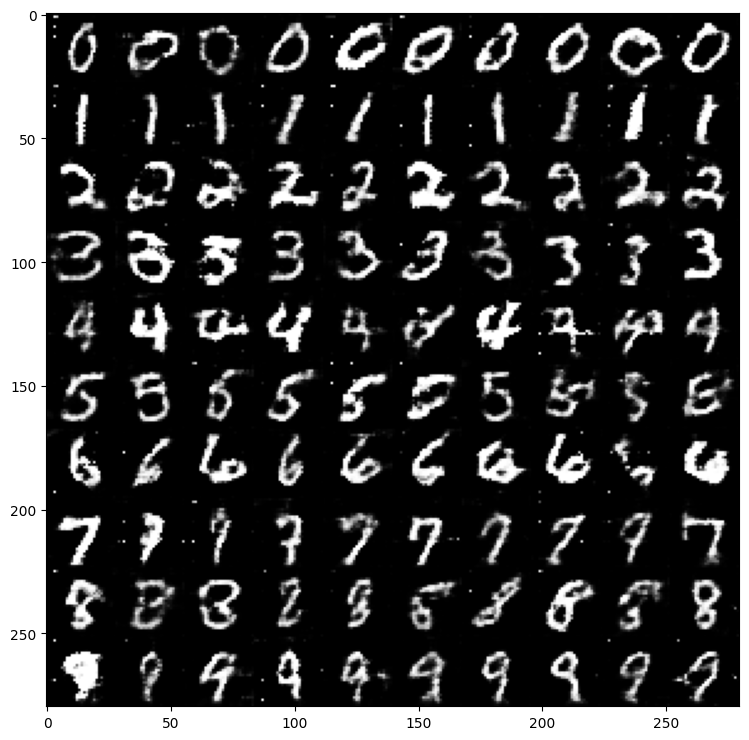

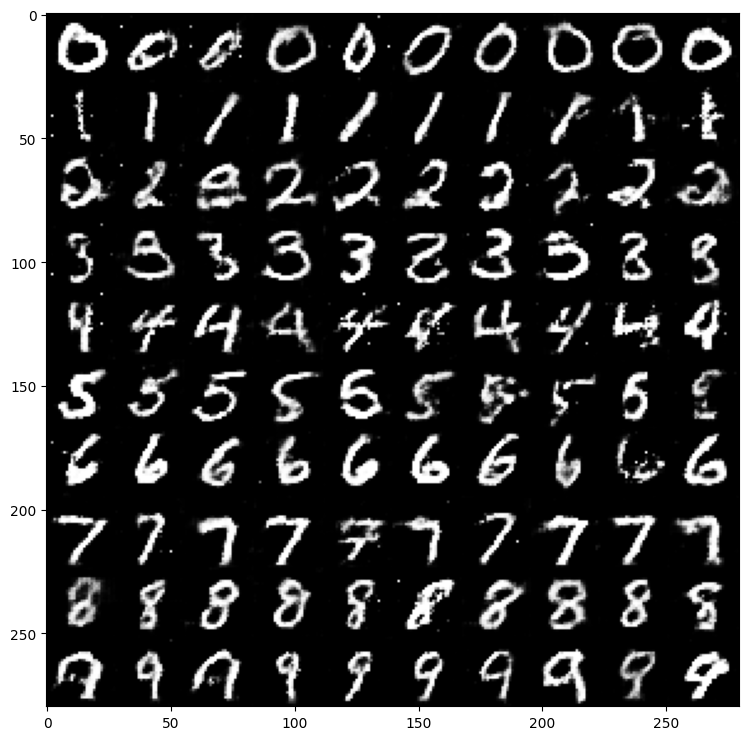

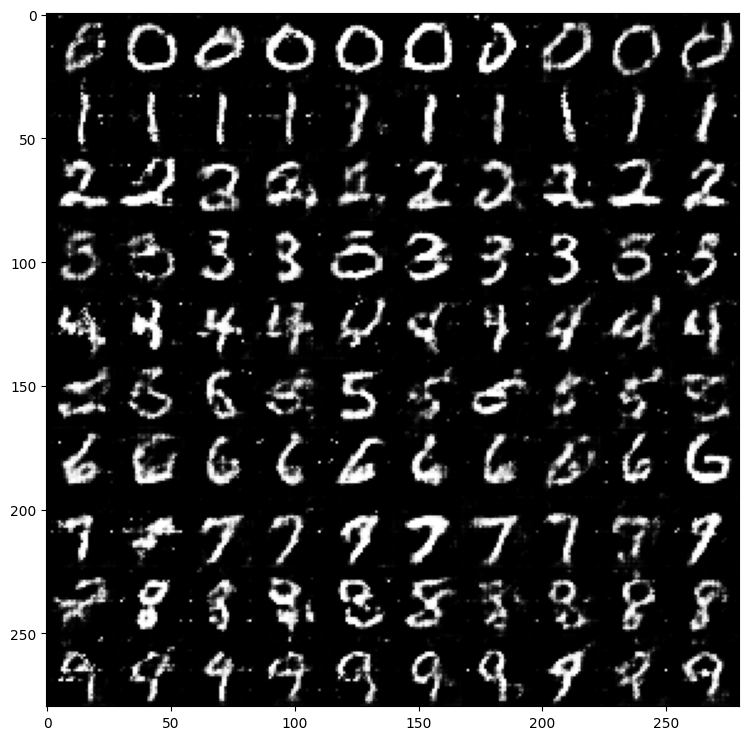

In [ ]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = disc_iters,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = beta)

In [ ]:
disc_iter_paths = (os.listdir("results/models/disc_iter/Vanilla_GAN"))

In [ ]:
for disc_iter in disc_iters:
  print(f"Vanilla GAN discriminator iterations = {disc_iter}")
  plot_f1_precison_recall(f"results/models/disc_iter/Vanilla_GAN/disc_iter_{disc_iter}/Vanilla_GAN_G_D_loss_scores_per_epoch.csv")
  plot_loss(f"results/models/disc_iter/Vanilla_GAN/disc_iter_{disc_iter}/Vanilla_GAN_G_D_loss_scores_per_epoch.csv")

Vanilla GAN discriminator iterations = 1


Vanilla GAN discriminator iterations = 2


Vanilla GAN discriminator iterations = 5


Vanilla_GAN, Dicriminator Iteration = 1


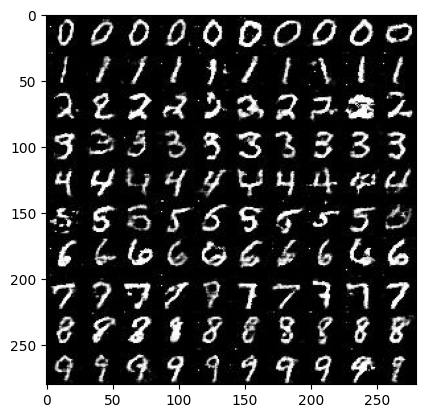

Vanilla_GAN, Dicriminator Iteration = 2


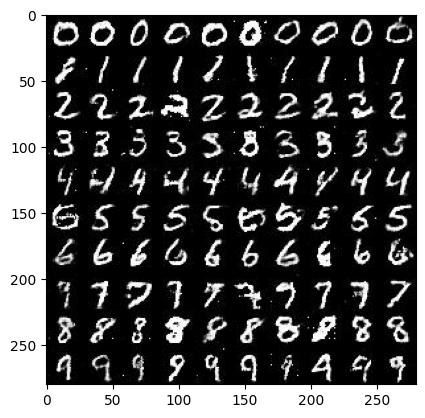

Vanilla_GAN, Dicriminator Iteration = 5


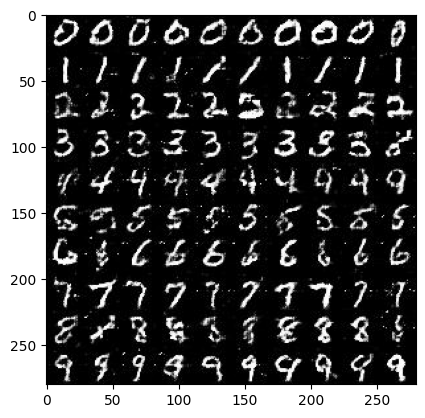

In [ ]:
MODEL_NAME = "Vanilla_GAN"
for disc_iter in disc_iters:
  print(f"{MODEL_NAME}, Dicriminator Iteration = {disc_iter}")
  path = f"results/imgs/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_last.jpg"
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

# LSGAN

In [ ]:
MODEL_NAME = values[values.model_name=="LSGAN"].model_name.values[0]
n_noise = values[values.model_name=="LSGAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="LSGAN"].batch_size.values[0])
n_critic = values[values.model_name=="LSGAN"].n_critic.values[0]
max_epoch = values[values.model_name=="LSGAN"].max_epochs.values[0]
clip_value = values[values.model_name=="LSGAN"].clip_value.values[0]
lr = values[values.model_name=="LSGAN"].best_lr.values[0]
beta = values[values.model_name=="LSGAN"].best_beta.values[0]


results/models/disc_iter/LSGAN/disc_iter_1
results/imgs/disc_iter/LSGAN/disc_iter_1
******************************

 Discriminator Iterations =  1 !
Starting the training LSGAN
Batch size = 128, learning rate = 0.001
Beta = 0.9
N critic = 1, N epochs = 20, Random Seed = True, Threshold = 0.5
Epoch: 0/20, D Loss: 0.0004181493422947824, G Loss: 0.9729347825050354
Epoch 0: Precision = 0.07478632475077378, Recall = 0.05605635683322745, F1 Score = 0.05907861123428873
Epoch: 1/20, D Loss: 0.002100472105666995, G Loss: 1.0897296667099
Epoch 1: Precision = 0.0, Recall = 0.0, F1 Score = 0.0
Epoch: 2/20, D Loss: 0.21124064922332764, G Loss: 0.30608803033828735
Epoch 2: Precision = 0.18814927233091683, Recall = 0.10349893161584577, F1 Score = 0.10776276604314616
Epoch: 3/20, D Loss: 0.20121365785598755, G Loss: 0.3225346505641937
Epoch 3: Precision = 0.6937952366503447, Recall = 0.477831196543866, F1 Score = 0.5027502058477666
Epoch: 4/20, D Loss: 0.18985402584075928, G Loss: 0.3069334030151367
E

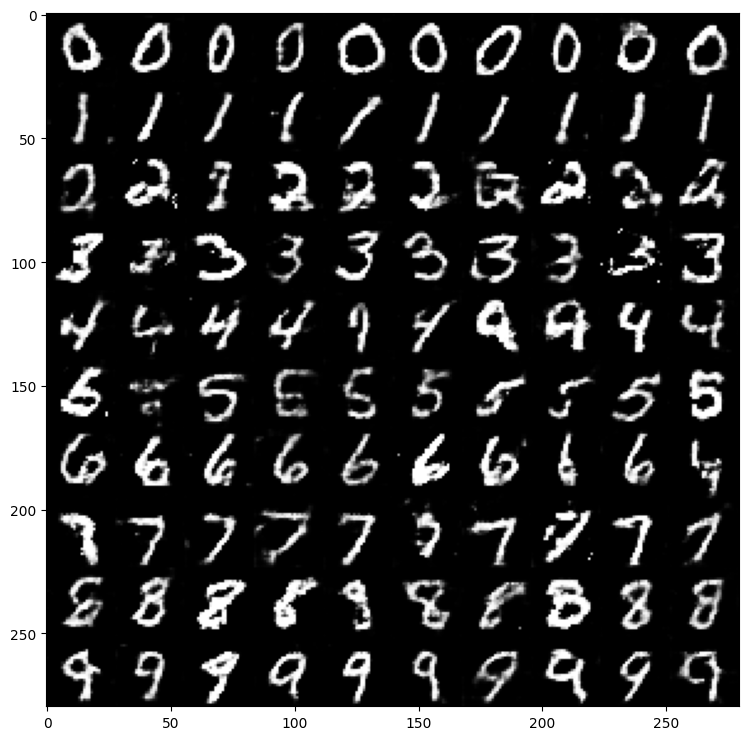

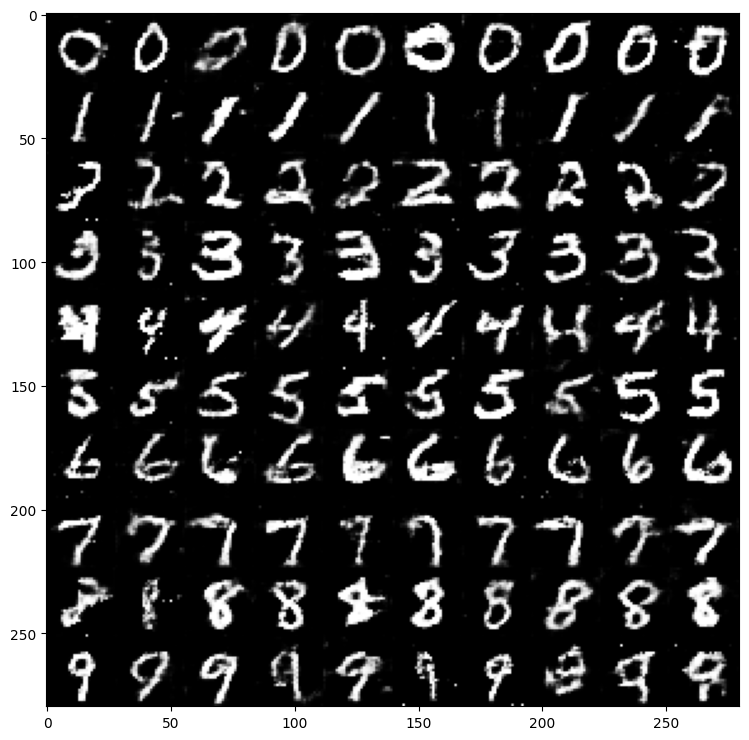

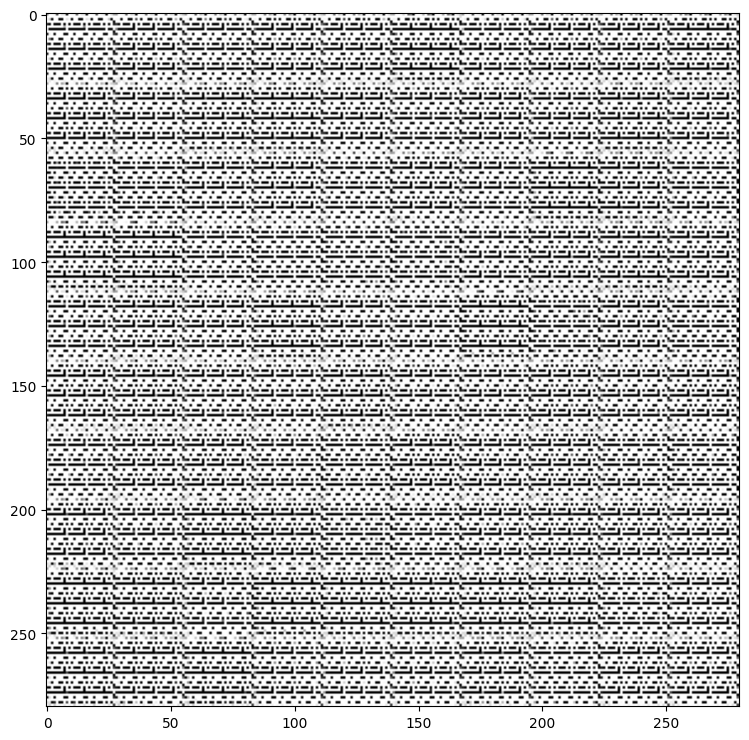

In [ ]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = disc_iters,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = beta)

In [ ]:
for disc_iter in disc_iters:
  print(f"{MODEL_NAME} Discriminator iteration = {disc_iter}")
  plot_f1_precison_recall(f"results/models/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
  plot_loss(f"results/models/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")

LSGAN Discriminator iteration = 1


LSGAN Discriminator iteration = 2


LSGAN Discriminator iteration = 5


LSGAN, Dicriminator Iteration = 1


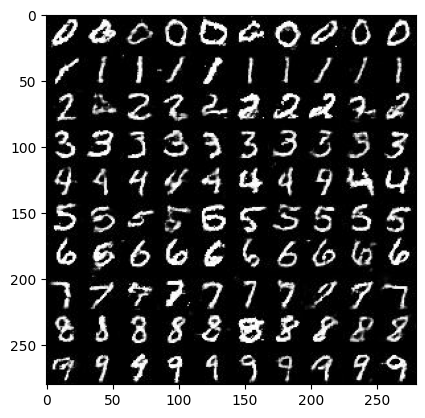

LSGAN, Dicriminator Iteration = 2


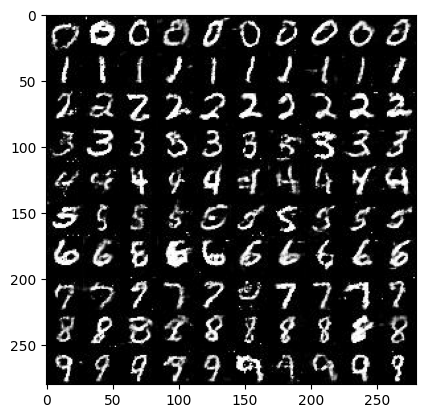

LSGAN, Dicriminator Iteration = 5


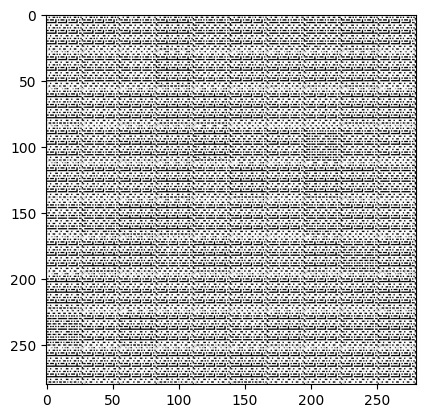

In [ ]:
MODEL_NAME = "LSGAN"
for disc_iter in disc_iters:
  print(f"{MODEL_NAME}, Dicriminator Iteration = {disc_iter}")
  path = f"results/imgs/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_last.jpg"
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

# WGAN GP

In [ ]:
MODEL_NAME = values[values.model_name=="WGAN_GP"].model_name.values[0]
n_noise = values[values.model_name=="WGAN_GP"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN_GP"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN_GP"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN_GP"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN_GP"].clip_value.values[0]
lr = values[values.model_name=="WGAN_GP"].best_lr.values[0]
beta = values[values.model_name=="WGAN_GP"].best_beta.values[0]


results/models/disc_iter/WGAN_GP/disc_iter_1
results/imgs/disc_iter/WGAN_GP/disc_iter_1
******************************

 Discriminator Iterations =  1 !
Starting the training WGAN_GP
Batch size = 128, learning rate = 0.001
Beta = 0.9
N critic = 1, N epochs = 33, Random Seed = True, Threshold = 0.5
Epoch: 0/33, D Loss: -0.2933003306388855, G Loss: -2.066887378692627
Epoch 0: Precision = 0.45146874428337735, Recall = 0.5669404379898954, F1 Score = 0.44927246148449546
Epoch: 1/33, D Loss: -0.14096730947494507, G Loss: -4.232617378234863
Epoch 1: Precision = 0.5188658829664303, Recall = 0.9239783653124306, F1 Score = 0.6625775589318116
Epoch: 2/33, D Loss: 0.2915571331977844, G Loss: -4.675310134887695
Epoch 2: Precision = 0.5035453066901779, Recall = 0.9595853364634955, F1 Score = 0.6602091643985836
Epoch: 3/33, D Loss: 0.1776188611984253, G Loss: -4.56820011138916
Epoch 3: Precision = 0.5041557453339868, Recall = 0.9393696580462714, F1 Score = 0.6556292804981452
Epoch: 4/33, D Loss: 0.24

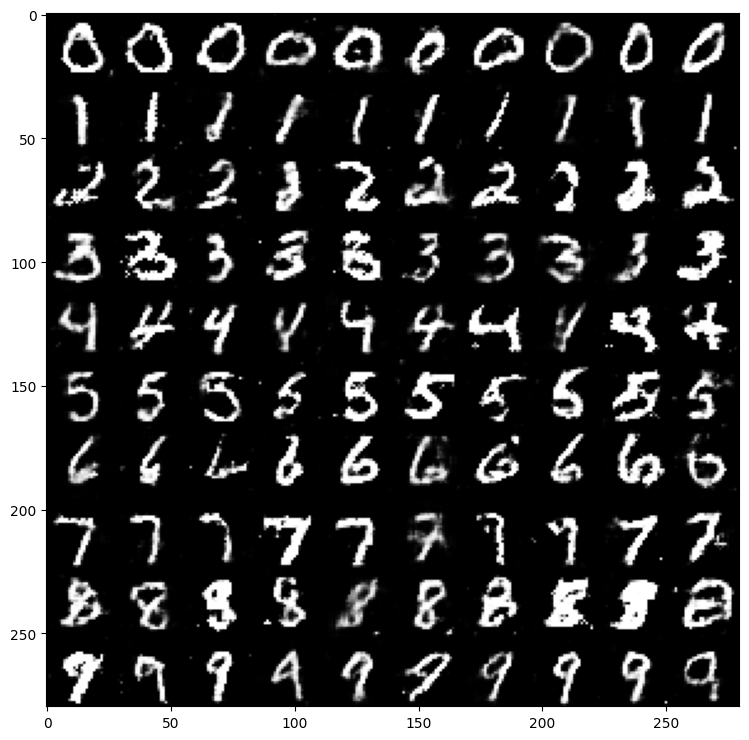

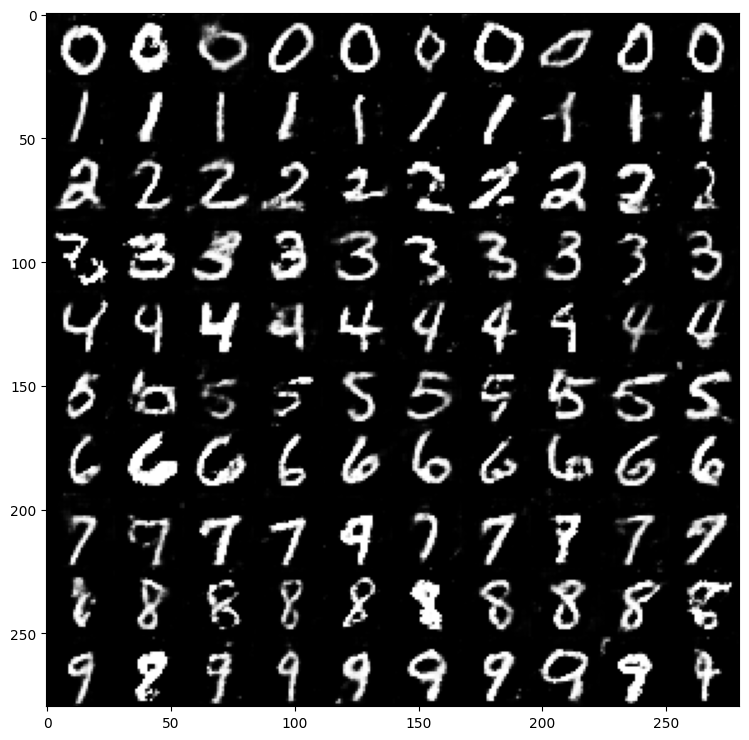

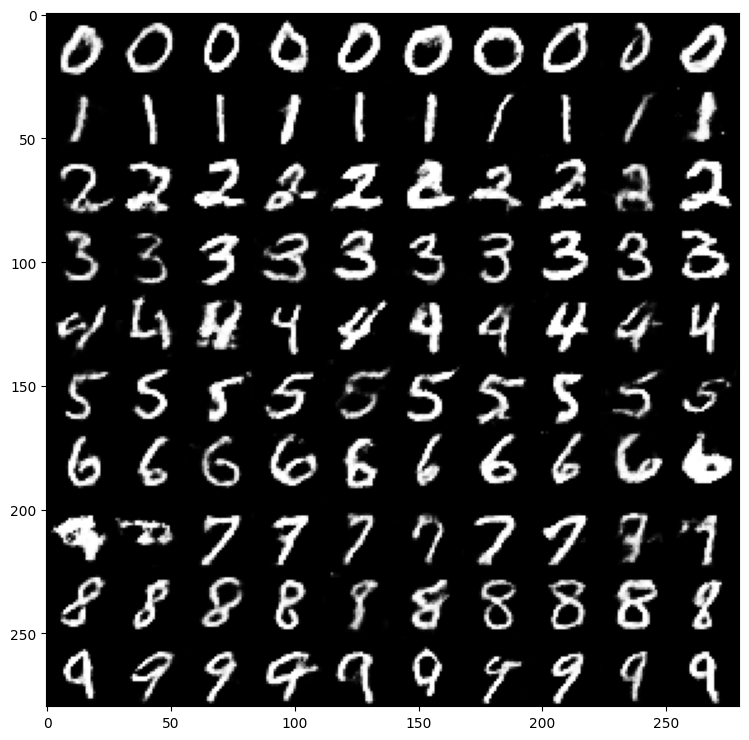

In [ ]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = disc_iters,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = beta
# )

In [ ]:
for disc_iter in disc_iters:
  print(f"{MODEL_NAME} Discriminator iteration = {disc_iter}")
  plot_f1_precison_recall(f"results/models/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
  plot_loss(f"results/models/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")

WGAN_GP Discriminator iteration = 1


WGAN_GP Discriminator iteration = 2


WGAN_GP Discriminator iteration = 5


WGAN_GP, Dicriminator Iteration = 1


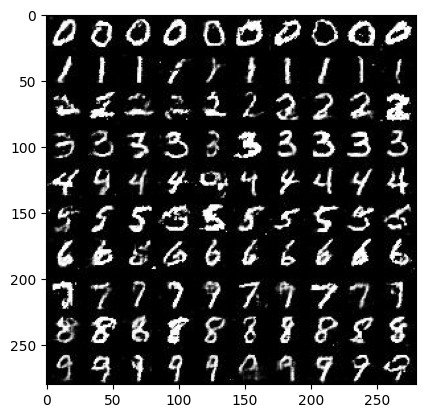

WGAN_GP, Dicriminator Iteration = 2


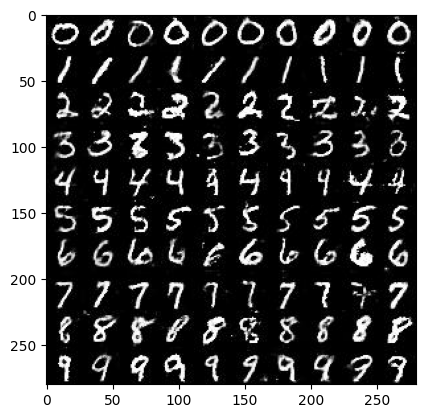

WGAN_GP, Dicriminator Iteration = 5


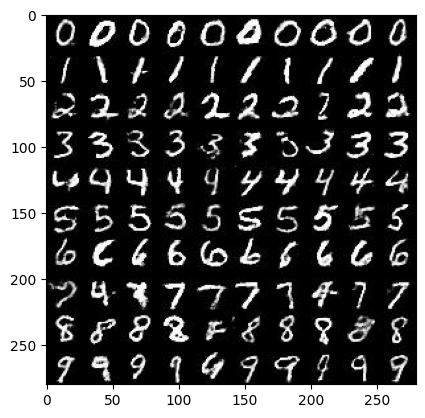

In [ ]:
MODEL_NAME = "WGAN_GP"
for disc_iter in disc_iters:
  print(f"{MODEL_NAME}, Dicriminator Iteration = {disc_iter}")
  path = f"results/imgs/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_last.jpg"
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

# WGAN

In [15]:
MODEL_NAME = values[values.model_name=="WGAN"].model_name.values[0]
n_noise = values[values.model_name=="WGAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN"].clip_value.values[0]
lr = values[values.model_name=="WGAN"].best_lr.values[0]
beta = values[values.model_name=="WGAN"].best_beta.values[0]


Removed results/imgs/disc_iter/WGAN/disc_iter_1
Removed results/models/disc_iter/WGAN/disc_iter_1
results/models/disc_iter/WGAN/disc_iter_1
results/imgs/disc_iter/WGAN/disc_iter_1
******************************

 Discriminator Iterations =  1 !
Starting the training WGAN
Batch size = 128, learning rate = 0.001
Beta = 0.9
N critic = 1, N epochs = 35, Random Seed = True, Threshold = 0.5
Epoch: 0/35, D Loss: -31.141952514648438, G Loss: 10.670635223388672
Epoch 0: Precision = 0.5473898479720698, Recall = 0.3876034989013427, F1 Score = 0.40940103534496536
Epoch: 1/35, D Loss: -78.11860656738281, G Loss: 26.184228897094727
Epoch 1: Precision = 0.03457409854510788, Recall = 0.020916800212041092, F1 Score = 0.022483259933703634
Epoch: 2/35, D Loss: -150.98321533203125, G Loss: 50.041664123535156
Epoch 2: Precision = 0.0, Recall = 0.0, F1 Score = 0.0
Epoch: 3/35, D Loss: -33.56083679199219, G Loss: -41.27960968017578
Epoch 3: Precision = 0.26556244609078683, Recall = 0.5147235576520947, F1 Sco

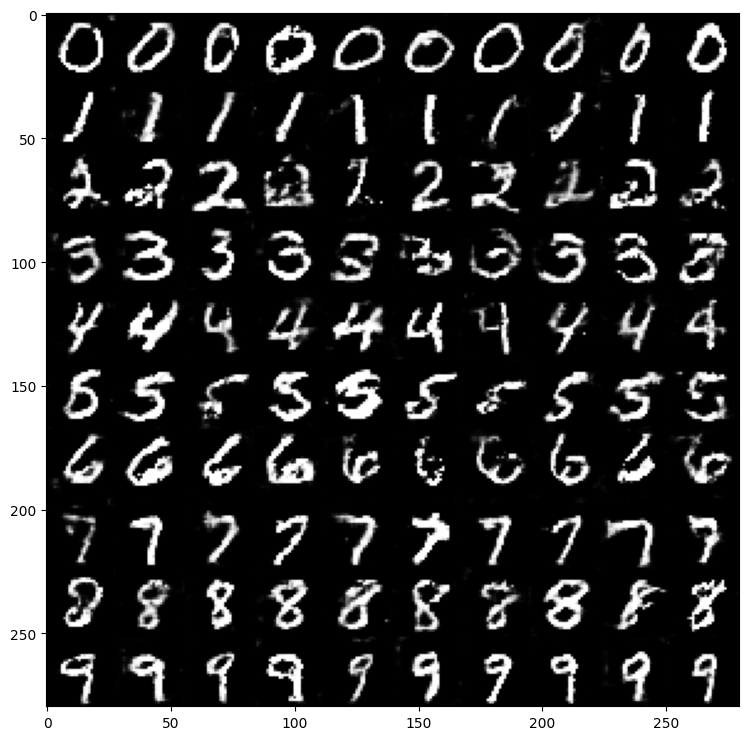

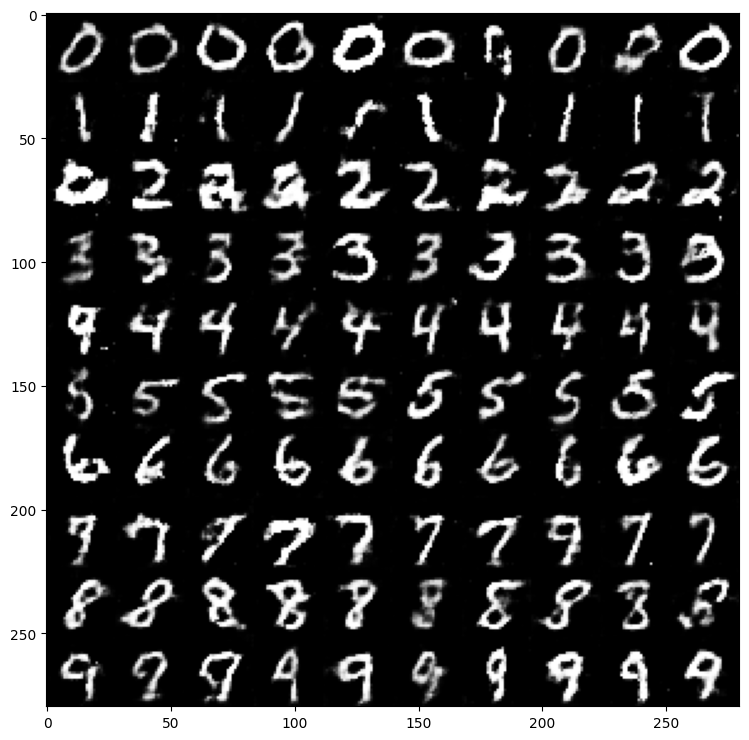

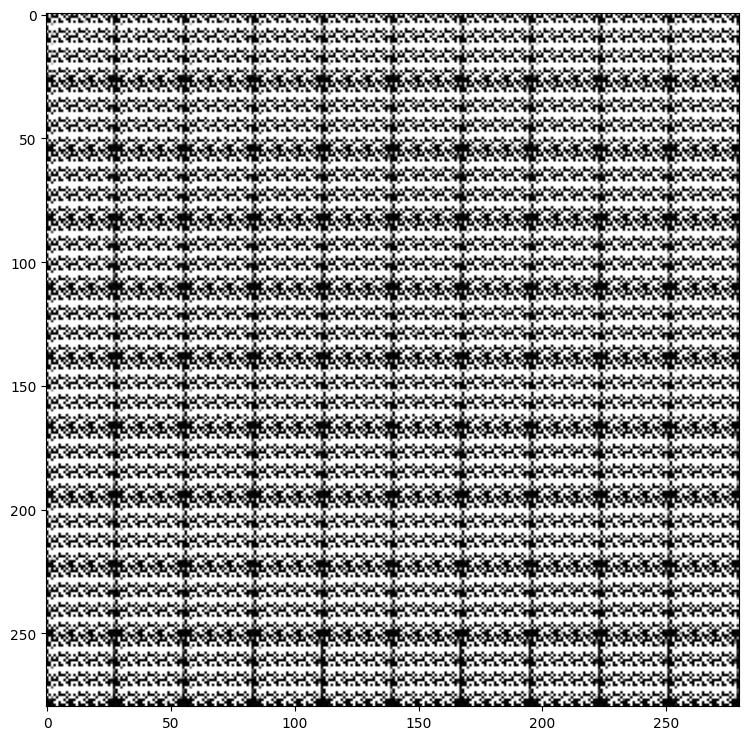

In [7]:

run(
  MODEL_NAME = MODEL_NAME,
  lrs = lr,
  batch_size = batch_size,
  n_critic = disc_iters,
  max_epoch = max_epoch, 
  clip_value = clip_value,
  n_noise = n_noise,
  threshold = 0.5,
  beta = beta)

In [8]:
for disc_iter in disc_iters:
  print(f"{MODEL_NAME} Discriminator iteration = {disc_iter}")
  plot_f1_precison_recall(f"results/models/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
  plot_loss(f"results/models/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")

WGAN Discriminator iteration = 1


WGAN Discriminator iteration = 2


WGAN Discriminator iteration = 5


WGAN, Dicriminator Iteration = 1


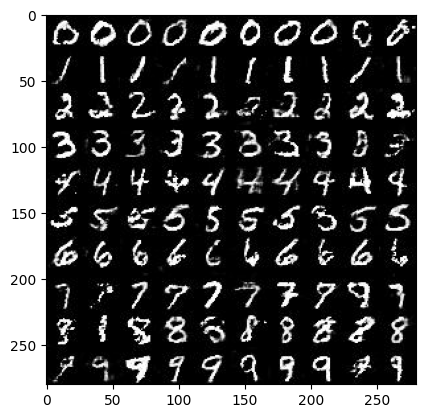

WGAN, Dicriminator Iteration = 2


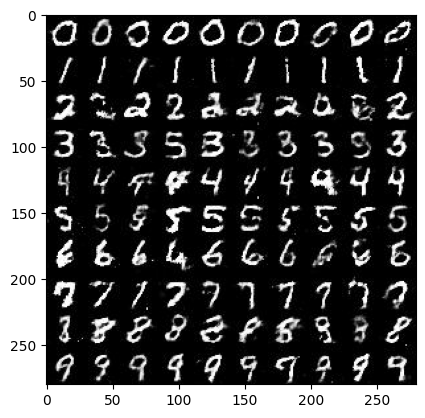

WGAN, Dicriminator Iteration = 5


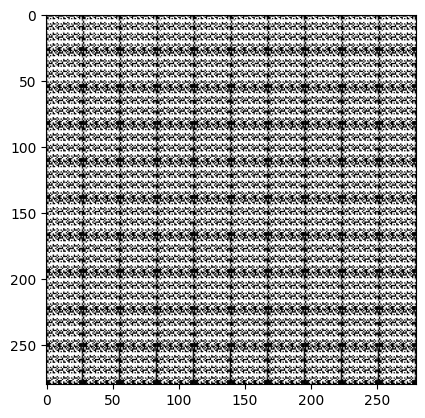

In [9]:
MODEL_NAME = "WGAN"
for disc_iter in disc_iters:
  print(f"{MODEL_NAME}, Dicriminator Iteration = {disc_iter}")
  path = f"results/imgs/disc_iter/{MODEL_NAME}/disc_iter_{disc_iter}/{MODEL_NAME}_last.jpg"
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

# FID SCORE

## Vanilla GAN

In [18]:
MODEL_NAME = "Vanilla_GAN"
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  model_path = f"results/models/disc_iter/{MODEL_NAME}/" + add
  # print(model_path)
  if os.path.exists(path):
      shutil.rmtree(path)
      # print(f"removed {path}")
  os.mkdir(path)
  # print(f"created {path}")

  for digit in range(0,10):
    digit = str(digit)
    Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [19]:
fid_scores = []
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  print(path)
  real_images_path = "real_images"
  generated_images_path = path
  batch_size = 20
  fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
  print(f"FID score: {fid}")
  fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["disc_iter"] = disc_iters
fid_df.to_csv(f"results/models/disc_iter/{MODEL_NAME}_FID_scores_vs_disc_iter.csv")
fid_df

generated_images/disc_iter/Vanilla_GAN/disc_iter_1
FID score: 97.71117610086895
generated_images/disc_iter/Vanilla_GAN/disc_iter_2
FID score: 95.508375863032
generated_images/disc_iter/Vanilla_GAN/disc_iter_5
FID score: 101.43798846510998


fid_score   model_name  disc_iter
0   97.711176  Vanilla_GAN          1
1   95.508376  Vanilla_GAN          2
2  101.437988  Vanilla_GAN          5

## LSGAN

In [20]:
MODEL_NAME = "LSGAN"
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  model_path = f"results/models/disc_iter/{MODEL_NAME}/" + add
  # print(model_path)
  if os.path.exists(path):
      shutil.rmtree(path)
      # print(f"removed {path}")
  os.mkdir(path)
  # print(f"created {path}")

  for digit in range(0,10):
    digit = str(digit)
    Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [21]:
fid_scores = []
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  print(path)
  real_images_path = "real_images"
  generated_images_path = path
  batch_size = 20
  fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
  print(f"FID score: {fid}")
  fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["disc_iter"] = disc_iters
fid_df.to_csv(f"results/models/disc_iter/{MODEL_NAME}_FID_scores_vs_disc_iter.csv")
fid_df

generated_images/disc_iter/LSGAN/disc_iter_1


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 110.18108332381385
generated_images/disc_iter/LSGAN/disc_iter_2
FID score: 87.6837771909216
generated_images/disc_iter/LSGAN/disc_iter_5
FID score: 748.3764249272614


fid_score model_name  disc_iter
0  110.181083      LSGAN          1
1   87.683777      LSGAN          2
2  748.376425      LSGAN          5

## WGAN

In [22]:
MODEL_NAME = "WGAN"
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  model_path = f"results/models/disc_iter/{MODEL_NAME}/" + add
  # print(model_path)
  if os.path.exists(path):
      shutil.rmtree(path)
      # print(f"removed {path}")
  os.mkdir(path)
  # print(f"created {path}")

  for digit in range(0,10):
    digit = str(digit)
    Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [23]:
fid_scores = []
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  print(path)
  real_images_path = "real_images"
  generated_images_path = path
  batch_size = 20
  fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
  print(f"FID score: {fid}")
  fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["disc_iter"] = disc_iters
fid_df.to_csv(f"results/models/disc_iter/{MODEL_NAME}_FID_scores_vs_disc_iter.csv")
fid_df

generated_images/disc_iter/WGAN/disc_iter_1


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 107.82997978596165
generated_images/disc_iter/WGAN/disc_iter_2
FID score: 109.52121333833816
generated_images/disc_iter/WGAN/disc_iter_5
FID score: 450.62705528484423


fid_score model_name  disc_iter
0  107.829980       WGAN          1
1  109.521213       WGAN          2
2  450.627055       WGAN          5

## WGAN GP

In [24]:
MODEL_NAME = "WGAN_GP"
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  model_path = f"results/models/disc_iter/{MODEL_NAME}/" + add
  # print(model_path)
  if os.path.exists(path):
      shutil.rmtree(path)
      # print(f"removed {path}")
  os.mkdir(path)
  # print(f"created {path}")

  for digit in range(0,10):
    digit = str(digit)
    Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [25]:
fid_scores = []
for disc_iter in disc_iters:
  path = f"generated_images/disc_iter/{MODEL_NAME}/"
  add = "disc_iter_" + str(disc_iter)
  path = path + add
  print(path)
  real_images_path = "real_images"
  generated_images_path = path
  batch_size = 20
  fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
  print(f"FID score: {fid}")
  fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["disc_iter"] = disc_iters
fid_df.to_csv(f"results/models/disc_iter/{MODEL_NAME}_FID_scores_vs_disc_iter.csv")
fid_df

generated_images/disc_iter/WGAN_GP/disc_iter_1


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 90.07798310891295
generated_images/disc_iter/WGAN_GP/disc_iter_2
FID score: 74.06797351109273
generated_images/disc_iter/WGAN_GP/disc_iter_5
FID score: 68.67802360138984


fid_score model_name  disc_iter
0  90.077983    WGAN_GP          1
1  74.067974    WGAN_GP          2
2  68.678024    WGAN_GP          5

# Discriminator iterations VS Loss

In [26]:
def load_model_and_results(MODEL_NAME):
  trained_disc_iters = os.listdir(f"results/models/disc_iter/{MODEL_NAME}/")
  root = f"results/models/disc_iter/{MODEL_NAME}/"
  G_loss_list = []
  D_loss_list = []


  for trained_disc_iter, disc_iter in zip(trained_disc_iters, disc_iters):
    print(f"Discriminator iterations {disc_iter}")
    path = root + trained_disc_iter + "/"

    G_loss, D_loss = load_model(path, disc_iter, n_noise)
    G_loss_list.append(G_loss.item())
    D_loss_list.append(D_loss.item())

    print("D = ",D_loss.item(), "G = ",G_loss.item())

  result_loss = pd.DataFrame()
  result_loss["D_loss"] = D_loss_list
  result_loss["G_loss"] = G_loss_list
  result_loss["disc_iter"] = disc_iters
  result_loss["disc_iter"] = result_loss["disc_iter"].astype('str')
  result_loss['size'] = 5
  result_loss.to_csv(f"results/models/disc_iter/{MODEL_NAME}_loss_values.csv")
  print(result_loss)


  fig = make_subplots(rows=1, cols=2)

  fig.add_trace(px.scatter(result_loss, x="disc_iter", y="D_loss",  size="size").data[0], row=1, col=1)
  fig.add_trace(px.scatter(result_loss, x="disc_iter", y="G_loss",  size="size").data[0], row=1, col=2)
  fig.update_layout(title="Loss vs Discriminator iterations", 
                    xaxis=dict(title="disc_iter"),
                    yaxis=dict(title="Loss"))

  fig.show()

  result_time = pd.read_csv(f"results/models/disc_iter/{MODEL_NAME}_runing_times.csv")
  result_time["size"] = 5
  
  print(result_time)

  fig = px.scatter(result_time, x="disc_iter", y="time", color="disc_iter", size="size", title = "run time vs Discriminator iterations")
  fig.show()  

### Vanilla GAN

In [27]:
load_model_and_results("Vanilla_GAN")

Discriminator iterations 1
D =  0.4574974477291107 G =  1.3131811618804932
Discriminator iterations 2
D =  1.3474143743515015 G =  0.723995566368103
Discriminator iterations 5
D =  0.05104043707251549 G =  6.601523399353027
     D_loss    G_loss disc_iter  size
0  0.457497  1.313181         1     5
1  1.347414  0.723996         2     5
2  0.051040  6.601523         5     5


   Unnamed: 0         time  disc_iter  size
0           0  1432.901185          1     5
1           1  1206.470791          2     5
2           2  1106.129982          5     5


### LSGAN

In [28]:
load_model_and_results("LSGAN")

Discriminator iterations 1
D =  0.2563930153846741 G =  0.15978235006332397
Discriminator iterations 2
D =  0.0981326550245285 G =  0.43146616220474243
Discriminator iterations 5
D =  0.00037581086507998407 G =  0.9667646884918213
     D_loss    G_loss disc_iter  size
0  0.256393  0.159782         1     5
1  0.098133  0.431466         2     5
2  0.000376  0.966765         5     5


   Unnamed: 0         time  disc_iter  size
0           0  1392.378954          1     5
1           1  1231.382300          2     5
2           2  1122.431539          5     5


### WGAN


In [29]:
load_model_and_results("WGAN")

Discriminator iterations 1
D =  0.03096771240234375 G =  -57.30742645263672
Discriminator iterations 2
D =  356.878173828125 G =  -3659.668701171875
Discriminator iterations 5
D =  -12615.345703125 G =  4309.2841796875
         D_loss       G_loss disc_iter  size
0      0.030968   -57.307426         1     5
1    356.878174 -3659.668701         2     5
2 -12615.345703  4309.284180         5     5


   Unnamed: 0         time  disc_iter  size
0           0  2549.454586          1     5
1           1  2175.857366          2     5
2           2  1960.107981          5     5


### WGAN-GP 


In [30]:
load_model_and_results("WGAN_GP")

Discriminator iterations 1
D =  0.02937239781022072 G =  -23.070053100585938
Discriminator iterations 2
D =  0.18904563784599304 G =  -20.470577239990234
Discriminator iterations 5
D =  -0.20495948195457458 G =  -12.083284378051758
     D_loss     G_loss disc_iter  size
0  0.029372 -23.070053         1     5
1  0.189046 -20.470577         2     5
2 -0.204959 -12.083284         5     5


   Unnamed: 0         time  disc_iter  size
0           0  3489.836542          1     5
1           1  3176.014103          2     5
2           2  2975.645810          5     5
